# Using Decision Tree & Naive Bayes to classify Legendary Pokemon

## Import libraries

In [1]:
import gc
import ast
import math
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
# from sklearn.feature_extraction import FeatureHasher
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from decisionTree import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Set packages options
# np.set_printoptions(threshold=np.nan)
pd.set_option("display.max_columns", 600)
plt.rcParams["figure.figsize"] = (11, 6)

## Define constants and functions

In [3]:
# Constants
TypeColorMappings = {"Water": "#6890F0", "Fire": "#F08030", "Grass": "#78C850",
                     "Dark": "#705848", "Electric": "#F8D030", "Flying": "#A890F0",
                     "Normal": "#A8A878", "Fighting": "#C03028", "Poison": "#A040A0",
                     "Ground": "#E0C068", "Psychic": "#F85888", "Rock": "#B8A038", 
                     "Ice": "#98D8D8", "Bug": "#A8B820", "Dragon": "#7038F8", 
                     "Ghost": "#705898", "Steel": "#B8B8D0", "Fairy": "#EE99AC"}

DropColumns = ["Pokedex#", "Name", "Type 1", "Type 2", "Generation", "Ability 1", "Ability 2", "Ability 3", 
               "EggGroup 1", "EggGroup 2", "Category", "Height (m)", "Weight (kg)"]

def getColorList(typeCounts):
    assert type(typeCounts) == pd.core.series.Series, "Argument must be a Series object"
    return [TypeColorMappings[pokemonType] for pokemonType in typeCounts.index]

def getDistinctValues(dataFrame, columnName, sep):
    result = []
    for value in dataFrame[columnName].value_counts().index:
        result += value.split(sep)

    return set(result)

## Load the data from file and perform feature transformations

In [4]:
# Load the Pokemon data
fileName = r'.\Pokemon_Cleaned.tsv'
columnTypes = {"Name": str, "Category": str, "Type 1": str, "Type 2": str, 
               "Ability 1": str, "Ability 2": str, "Ability 3": str, "Group": str}
data = pd.read_csv(fileName, header=0, sep='\t', dtype=columnTypes).fillna("None")
data.head()

# # Transform list of abilities and egg groups to "string" numeric values
# eggGroups = getDistinctValues(data, "EggGroups", "---")
# abilities = getDistinctValues(data, "Abilities", "---")

# eggGroupsMappings = {}
# for i, eg in enumerate(eggGroups): eggGroupsMappings[eg] = i    
    
# abilitiesMappings = {}
# for i, abil in enumerate(abilities): abilitiesMappings[abil] = i
    
# for i in range(len(data)):
#     numberStr = ""
#     values = sorted([abilitiesMappings[abil] for abil in data.loc[i, "Abilities"].split("---")])
#     val = ''.join(map(lambda x: str(x).zfill(3), values))
#     data.loc[i, "Abilities"] = val

# for i in range(len(data)):
#     numberStr = ""
#     values = sorted([eggGroupsMappings[eg] for eg in data.loc[i, "EggGroups"].split("---")])
#     val = ''.join(map(lambda x: str(x).zfill(3), values))
#     data.loc[i, "EggGroups"] = val

,Generation,Pokedex#,Name,Category,Type 1,Type 2,Ability 1,Ability 2,Ability 3,MaleRatio,FemaleRatio,Height (m),Weight (kg),EggGroup 1,EggGroup 2,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed,Total,Group
0,1.0,1.0,Bulbasaur,Seed Pokemon,Grass,Poison,Chlorophyll,Overgrow,None,87.5,12.5,0.7,6.9,Monster,Grass,45.0,49.0,49.0,65.0,65.0,45.0,318,Ordinary
1,1.0,2.0,Ivysaur,Seed Pokemon,Grass,Poison,Chlorophyll,Overgrow,None,87.5,12.5,1.0,13.0,Monster,Grass,60.0,62.0,63.0,80.0,80.0,60.0,405,Ordinary
2,6.0,3.0,Mega Venusaur,Seed Pokemon,Grass,Poison,Thick Fat,None,None,87.5,12.5,2.0,100.0,Monster,Grass,80.0,100.0,123.0,122.0,120.0,80.0,625,Ordinary
3,1.0,3.0,Venusaur,Seed Pokemon,Grass,Poison,Chlorophyll,Overgrow,None,87.5,12.5,2.0,100.0,Monster,Grass,80.0,82.0,83.0,100.0,100.0,80.0,525,Ordinary
4,1.0,4.0,Charmander,Lizard Pokemon,Fire,None,Blaze,Solar Power,None,87.5,12.5,0.6,8.5,Monster,Dragon,39.0,52.0,43.0,60.0,50.0,65.0,309,Ordinary


## Plot graphs to visualize and understand the data

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Group Types')]

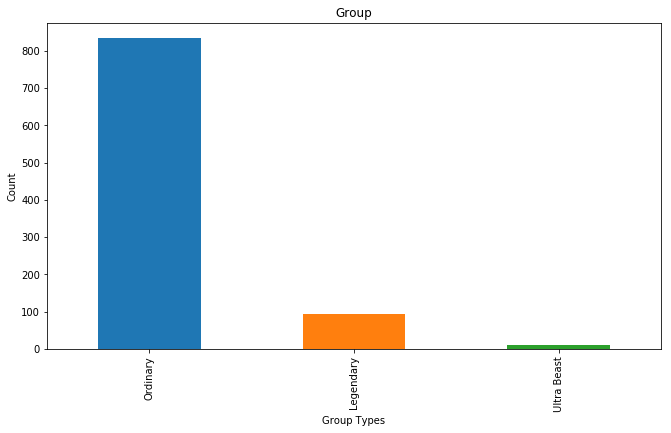

In [378]:
# Plot Group occurences to see the distributions
groupFig, groupAxes = plt.subplots(nrows=1, ncols=1)
groupCounts = data["Group"].value_counts()
groupAxe = groupCounts.plot(title="Group", kind="bar")
groupAxe.set(xlabel="Group Types", ylabel="Count")

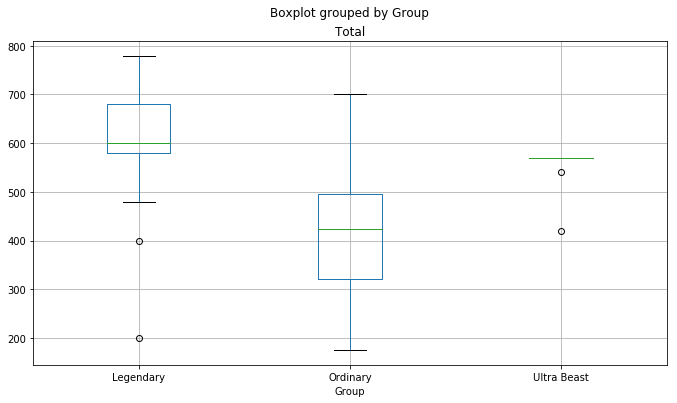

In [10]:
# Box plot Total & Group
data.boxplot("Total", "Group")

<p> According to the boxplot above, we can see that despite having a small quanity in size, Legendary Pokemon has the highest Total stats compared to the other 2 groups.</p>

## PCA

In [41]:
reducedData = data.drop(DropColumns, axis=1)
# dummies = pd.get_dummies(data[["Type 1", "Type 2", "Ability 1", "Ability 2", "Ability 3", "EggGroup 1", "EggGroup 2"]])
# dataWithDummies = pd.concat([dummies, reducedData], axis=1, join_axes=[reducedData.index])

# x = dataWithDummies.loc[:, dataWithDummies.columns != "Group"]
# y = dataWithDummies.loc[:, "Group"]

# Scale the x data
#x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)
width, height = principalComponents.shape
principalDf = pd.DataFrame(data=principalComponents, columns=["pca %d" % i for i in range(1, height + 1)])
pcaData = pd.concat([principalDf, dataWithDummies[["Group"]]], axis=1)

xTrain = pcaData.sample(frac=0.5)

In [ ]:
# # Plot Type 1 and Type 2 occurences to see the distributions
# typeFig, typeAxes = plt.subplots(nrows=3, ncols=1)
# typeFig.subplots_adjust(top=3)

# type1Counts = data["Type 1"].value_counts()
# type2Counts = data["Type 2"].value_counts().drop("None")
# typesCounts = type1Counts.add(type2Counts, fill_value=0)

# type1Counts.plot(title="Type 1 Occurrences", kind="bar", ax=typeAxes[0], color=getColorList(type1Counts))
# type2Counts.plot(title="Type 2 Occurrences", kind="bar", ax=typeAxes[1], color=getColorList(type2Counts))
# typesCounts.plot(title="Type 1 + 2 Occurrences", kind="bar", ax=typeAxes[2], color=getColorList(typesCounts))

# fh = FeatureHasher(n_features=2, input_type="string")
# hashedFeature1 = fh.fit_transform(data["Type 1"])
# hashedFeature2 = fh.fit_transform(data["Type 2"])

# x = pd.concat([data[["Name", "Type 1", "Type 2", "Category"]], pd.DataFrame(hashedFeature1.toarray())], axis=1)
# x = pd.concat([x, pd.DataFrame(hashedFeature2.toarray())], axis=1)


## Decision Tree

In [141]:
dt = DecisionTree("Group")
tr = data.sample(100)
te = data.sample(30)

node = dt.train(tr)
pred = dt.classify(te, node)

Best feature EggGroup 1 Best gain: 0.20895000000000002
Best feature Ability 1 Best gain: 0.20424107142857145
Best feature None Best gain: 0.0
Best feature Name Best gain: 0.13265306122448978
Best feature None Best gain: 0.0
Best feature None Best gain: 0.0
Best feature None Best gain: 0.0


In [145]:
print(computeError(pred, te["Group"], "Group"))

0.06666666666666665


In [146]:
def splitData(dataFrame, trainingRatio):
    #assert trainingRatio + testRatio == 1.0, "Total ratio of training and test must add up to 1"
    msk = np.random.rand(len(dataFrame)) < trainingRatio
    return dataFrame[msk], dataFrame[~msk]

def computeError(predictions, actuals, targetFeature):
    predCounts = predictions.value_counts()
    actualCounts = actuals.value_counts()
    allLabels = predCounts.index.union(actualCounts.index)
        
    misClassified = 0
    for label in allLabels:
        if (label in actualCounts):
            misClassified += abs(predCounts[label] - actualCounts[label])
        else:
            misClassified += predCounts[label]
    return 1 - ((len(actuals) - misClassified) / len(actuals))

In [43]:
# x = data.loc[:, data.columns != "Group"].fillna("None")
# y = data.loc[:, "Group"]

# training = data.sample(439)
training, test = splitData(reducedData, 0.65)

In [ ]:
dt = DecisionTree("Group")
node = dt.train(training)
predictions = dt.classify(test, node)
# dt.findBestFeature(training)

# impurity = dt.giniImpurity(training)
# left, right = dt.partition(training, "EggGroup 1", "Monster")
# left, right = dt.partition(training, "Total", 0.8)
# ig = dt.informationGain(left, right, impurity)
# ig

In [114]:
ratios = [i*0.1 for i in range(1, 10)]#[0.2, 0.4, 0.6, 0.8]
dt = DecisionTree("Type 1")

In [ ]:
reducedDataX = []
reducedDataY = []
for ratio in ratios:
    print("************ Spliting", ratio)
    training, test = splitData(reducedData, ratio)
    node = dt.train(training)
    predictions = dt.classify(test, node)
    error = computeError(predictions, test[dt.targetFeature].value_counts())
    
    reducedDataX.append(len(training))
    reducedDataY.append(error)

In [ ]:
x = []
y = []
for ratio in ratios:
    print("************ Spliting", ratio)
    training, test = splitData(data, ratio)
    node = dt.train(training)
    predictions = dt.classify(test, node)
    error = computeError(predictions, test[dt.targetFeature].value_counts())
    
    x.append(len(training))
    y.append(error)

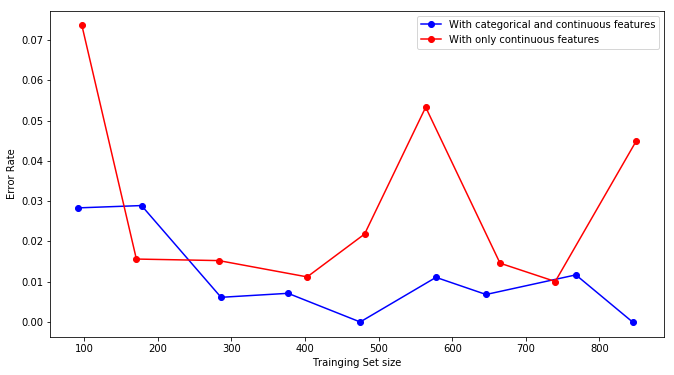

In [105]:
plt.plot(x, y, 'bo-', label="With categorical and continuous features")
plt.plot(reducedDataX, reducedDataY, 'ro-', label="With only continuous features")
plt.xlabel("Trainging Set size")
plt.ylabel("Error Rate")
plt.legend(loc="best")

In [ ]:
# Get data profile
profile = pdp.ProfileReport(dataWithDummies)
profile.to_file("Profile.html")
profile = None
gc.collect()